In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
%matplotlib inline

In [2]:
x = []
for i in range(-1000, 1000, 1):
    x.append((i*np.pi)/180)
sin_x = np.sin(x)
cos_x = np.cos(x)

In [3]:
x = np.linspace(start=1, stop=10, num=10)

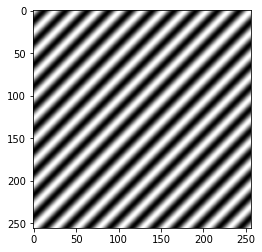

In [4]:
N = 256
x = np.linspace(-np.pi,np.pi, N)
sine1D = 128.0 + (127.0 * np.cos(x * 10.0))
sine1D = np.uint8(sine1D)
sine2D = np.ndarray((N,N), dtype=np.uint8)
for i in range(N):
    #sine2D[i]= sine1D
    sine2D[i]= np.roll(sine1D, -i)  # shift the 1D sin data by -i, -i increases with rows
plt.imshow(sine2D,interpolation='bilinear', cmap='gray')
plt.show()

360


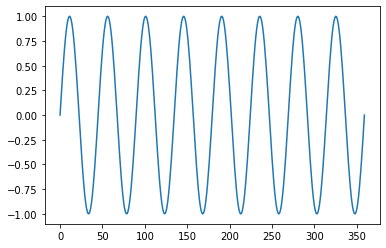

In [5]:
x = np.linspace(-np.pi, np.pi, 360)
y = np.sin(x*8)
print(len(y))
plt.plot(y)
plt.show()

(512, 768)


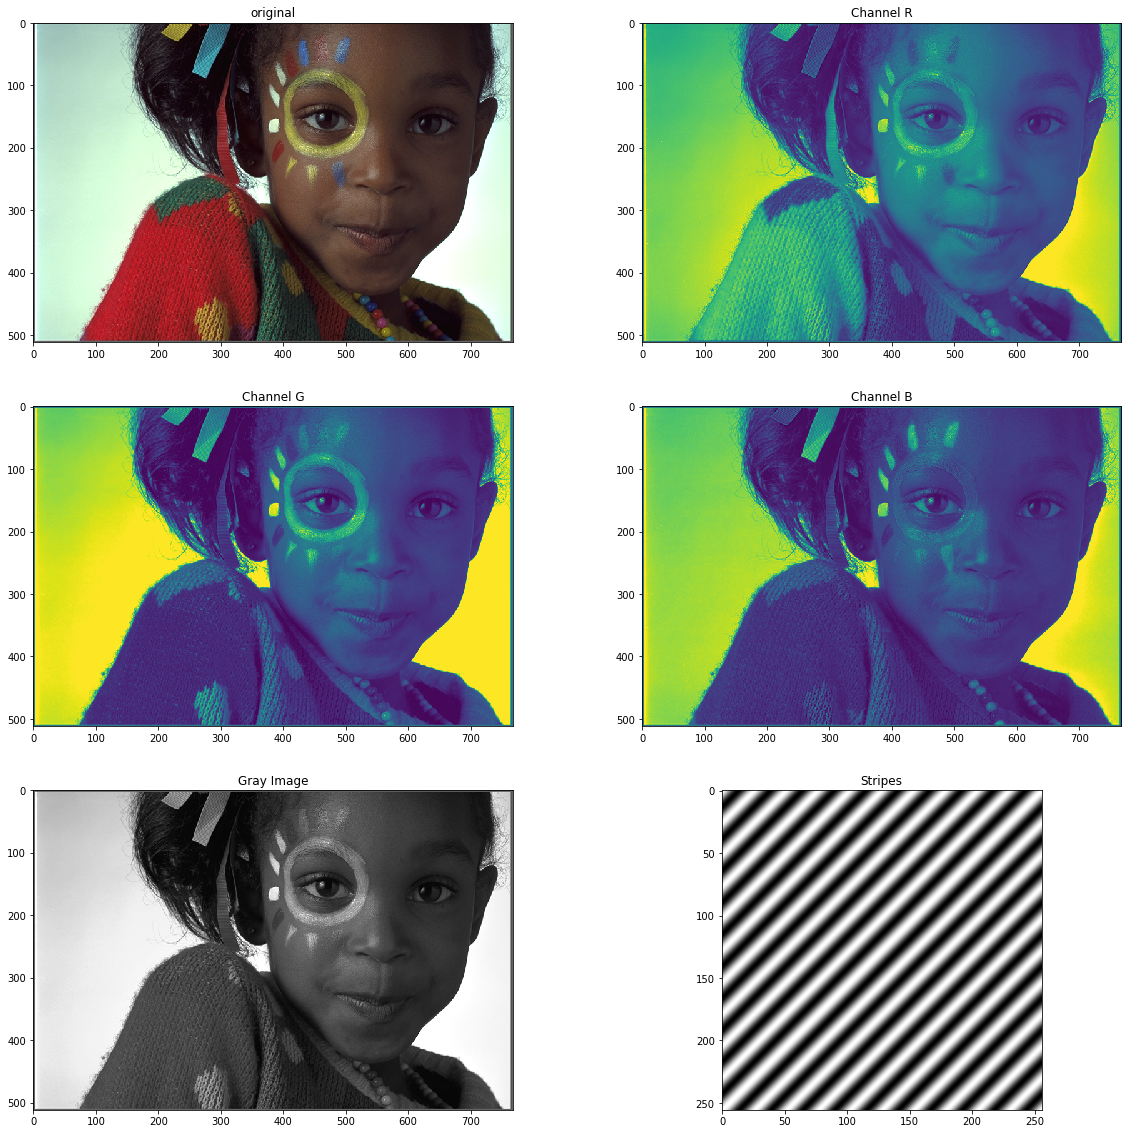

In [6]:
N = 256
x = np.linspace(-np.pi,np.pi, N)
sine1D = 128.0 + (127.0 * np.cos(x * 10.0))
sine1D = np.uint8(sine1D)
sine2D = np.ndarray((N,N), dtype=np.uint8)
for i in range(N):
    #sine2D[i]= sine1D
    sine2D[i]= np.roll(sine1D, -i)  # shift the 1D sin data by -i, -i increases with rows
tm = img.imread('temp/girl.png')
R, G, B = tm[:,:,0], tm[:,:,1], tm[:,:,2]

# display images with each channel separating
fig1, ax = plt.subplots(nrows=3, ncols=2, figsize=(20,20))

ax[0][0].set_title("original")
ax[0][0].imshow(tm)

ax[0][1].set_title("Channel R")
ax[0][1].imshow(R)

ax[1][0].set_title("Channel G")
ax[1][0].imshow(G)

ax[1][1].set_title("Channel B")
ax[1][1].imshow(B)

# computing the gray image
gim = 0.2989*R + 0.5870*G + 0.1140*B

ax[2][0].set_title("Gray Image")
ax[2][0].imshow(gim, cmap='gray')

ax[2][1].set_title("Stripes")
ax[2][1].imshow(sine2D, interpolation='bilinear',cmap='gray')
#plt.imshow(sine2D,interpolation='bilinear', cmap='gray')
#plt.imshow(gim, cmap='gray')
#plt.show()
dem_img = np.zeros((255,255))

print(gim.shape)

### Finding Discrite Cosine Transform for compressing the image *(Used in jpeg formatting)*
#### Formula for calculating 
# 👉
![DCT IMAGE](./temp/dct.jpeg)

In [7]:
def find_dct(mat, M, N):
    dct = np.zeros(mat.shape)
    for p in range(M):
        for q in range(N):
            
            ## Calculate alphas
            if p == 0:
                alphap = 1/np.sqrt(M)
            else:
                alphap = np.sqrt(2)/np.sqrt(M)
            if q == 0:
                alphaq = 1/np.sqrt(N)
            else:
                alphaq = np.sqrt(2)/np.sqrt(N)
            
            ## Calculate summation
            _sum = 0
            for m in range(M):
                for n in range(N):
                    
                    Amn = mat[m][n]
                    cosm = np.cos((2 * m + 1) * p * np.pi/(2*M))
                    cosn = np.cos((2 * n + 1) * q * np.pi/(2*N))
                    
                    _sum += Amn * cosm * cosn
            ## Assign to Bpq or mat value
            dct[p][q] = alphap * alphaq * _sum
                
    return dct
            

### inverting the compressed image
#### formula for inversion
# 👉

![Inverse DCT](./temp/idct01.jpeg)

In [8]:
def find_inverse_dct(mat, M, N):
    
    idct = np.zeros(mat.shape)
    for  m in range(M):
        for n in range(N):
            
            _sum = 0
            for p in range(M):
                for q in range(N):
                    
                    ## Calculate alphas
                    if p == 0:
                        alphap = 1/np.sqrt(M)
                    else:
                        alphap = np.sqrt(2)/ np.sqrt(M)
                    if q == 0:
                        alphaq = 1/np.sqrt(N)
                    else:
                        alphaq = np.sqrt(2)/ np.sqrt(N)
                    
                    ## Calculate cosines 
                    cosm = np.cos( (2*m + 1) * p * np.pi/(2*M) )
                    cosn = np.cos( (2*n + 1) * q * np.pi/(2*N) )
                    Bpq = mat[p][q]
                    
                    _sum += alphap * alphaq * Bpq * cosm * cosn
                    
            ## Assign summation to Amn
            idct[m][n] = _sum
              
    return idct

In [9]:
## Load an image
mat = img.imread('./temp/girl c.png')

## Separate RGB values
R, G, B = mat[:,:,0], mat[:,:,1], mat[:,:,2]

## Convert to gray scale by the ratio
gim = 0.2989*R + 0.5870*G + 0.1140*B

## find DCT 
dct = find_dct(gim, gim.shape[0], gim.shape[1])

## find Inverse DCT from DCT
idct = find_inverse_dct(dct, dct.shape[0], dct.shape[1])

Text(0.5, 1.0, 'I_DCT')

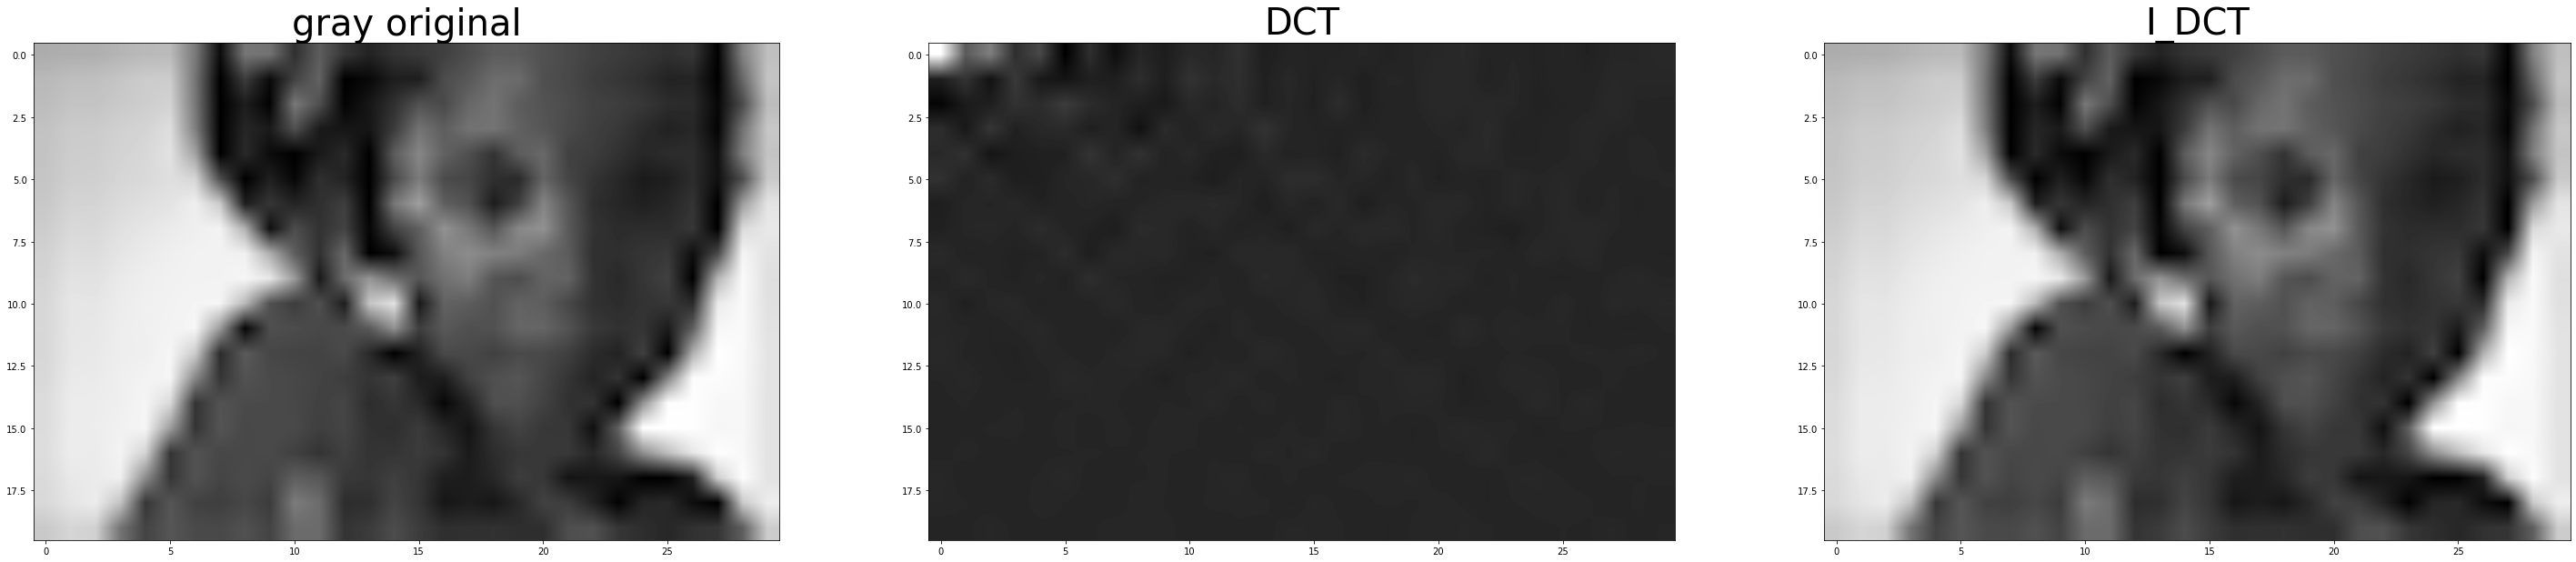

In [10]:
## Display the Matrices as a image
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(50,50))

ax[0].imshow(gim, interpolation='bilinear', cmap='gray')
ax[0].set_title(label="gray original", fontsize=40)
ax[1].imshow(dct, interpolation='bilinear', cmap='gray')
ax[1].set_title(label="DCT", fontsize=40)
ax[2].imshow(idct, interpolation='bilinear',cmap='gray')
ax[2].set_title(label="I_DCT", fontsize=40)

> The size reduces from **900 B** to **600B**

In [11]:
## saving results
plt.imsave('./temp/results/gray_image.jpeg', gim, cmap='gray')
plt.imsave('./temp/results/compressed_image.jpeg', dct, cmap='gray')
plt.imsave('./temp/results/reconstructed_image.jpeg', idct, cmap='gray')

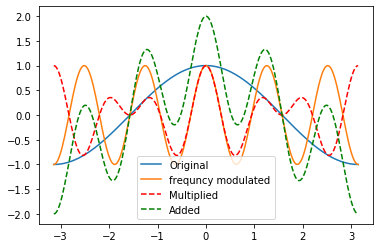

In [12]:
## Sample to show how the DCT works based on interference

## initialise an array wiht equally separated values from -π to π around 256 values
x = np.linspace(-np.pi, np.pi, 256)

## Find cos of the above array
cos_a = np.cos(x)

## change frequency for above values in cos with same phase
cos_b = np.cos(5*x)

## now find new cos wave

## BY multiplying
cos_c = cos_a * cos_b

## By adding
cos_d = cos_a + cos_b

avg_gr = np.zeros(len(cos_a))
for i in range(len(cos_a)):
    avg_gr[i] = np.sqrt(abs((cos_a[i] * cos_b[i])))
plt.plot(x, cos_a, label='Original')
plt.plot(x, cos_b, label='frequncy modulated')
plt.plot(x, cos_c, '--r', label='Multiplied')
plt.plot(x, cos_d, '--g', label='Added')
#plt.plot(x, avg_gr, '+', label='avg')
plt.legend()

In [245]:
x = np.asarray([[1,2]])
x.shape

(1, 2)